In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [8]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df



,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


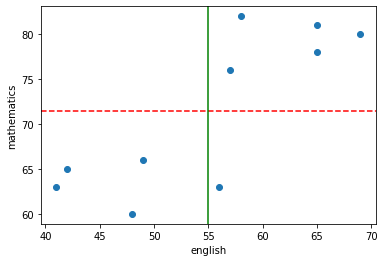

In [18]:
plt.xlabel('english')
plt.ylabel('mathematics')

plt.scatter(scores_df['english'], scores_df['mathematics'])
plt.axhline(scores_df['mathematics'].mean(), color='r', ls='--') # 인자로 준 값으로 기준선을 그려줌

plt.axvline(scores_df['english'].mean(), color='g', ls='-')
plt.show()

## 공분산
- 두 데이터 사이의 관계를 나타내는 지표
- 단위에 따라 달라짐

양의 값 : 면적이 양의 값이 되는 데이터가 많다 ( + 끼리, 또는 -끼리 곱한다)
양의 상관 관계

음의 값 : 면적이 음의 값이 되는 데이터가 많다는 뜻 : 음의 상관 관계 0 에 가까우면 무상관


In [19]:
summary_df = scores_df.copy()

# 영어 점수의 편차
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()

# 수학 점수의 편차
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()

# 영어 편차, 수학 편차의 곱
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [32]:
def covariance(X, Y): 
    ax, ay = X.mean(), Y.mean()
    data = [round((x-ax)*(y-ay),2) for x, y in zip(X, Y)]
    print('data:',data)
    return sum(data) / len(X)

In [25]:
eng  = summary_df['english']
math = summary_df['mathematics']

In [33]:
covariance(eng, math)

data: [83.2, 120.4, -8.4, 117.6, 9.2, 79.8, 96.0, 32.4, 66.0, 31.8]


62.8

In [34]:
covariance(math, math)

data: [40.96, 73.96, 70.56, 70.56, 21.16, 129.96, 92.16, 29.16, 43.56, 112.36]


68.44

In [37]:
covariance(eng, eng)

data: [169.0, 196.0, 1.0, 196.0, 4.0, 49.0, 100.0, 36.0, 100.0, 9.0]


86.0

In [38]:
# 공분산 함수
## ddof = 0 (모집단 n으로 나눈다.)
## ddof = 1 (표본집단 n-1으로 나눈다.)

np.cov(eng, math, ddof=0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [44]:
# 동일한 값을 공분산 하면 분산의 결과와 같음

# ddof = 1 적용
print(eng.var())

# ddof = 0 적용
print(eng.values.var())

95.55555555555556
86.0


## 상관계수
: 공분산 수치를 표준화

  단위에 의존하지 않는 상관 관계지표
    - (편차로 나눈다. -1 ~ 1 사이의 값을 가진다)

In [47]:
np.cov(eng, math,ddof=0)[0,1]

62.800000000000004

In [51]:
# 공분산 값에서 각 표준편차를 곱한값을 나눠줌
np.cov(eng, math,ddof=0)[0,1] / (np.std(eng)*np.std(math))

0.8185692341186713

In [52]:
# 상관관계
np.corrcoef(eng, math)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])